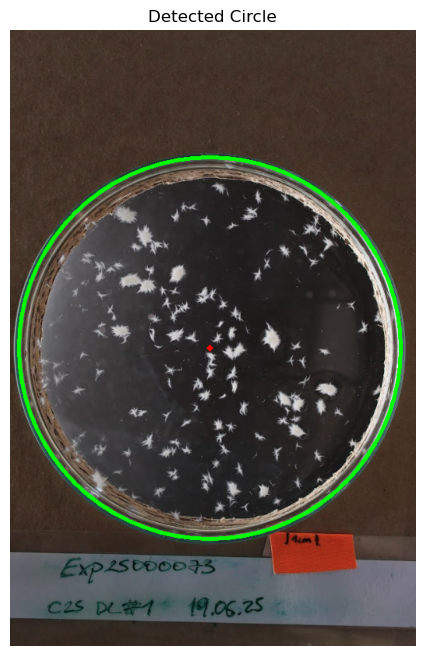

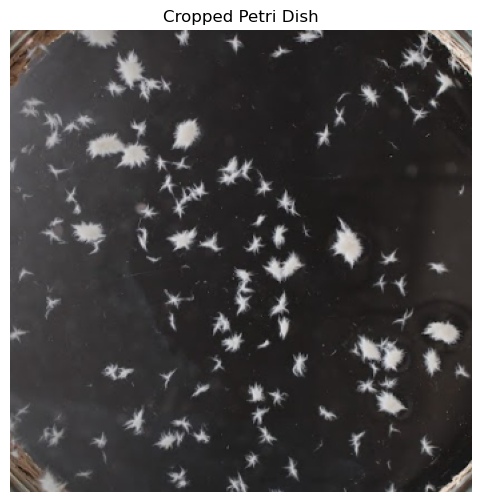

array([[[ 79,  87,  67],
        [118, 127, 120],
        [156, 165, 169],
        ...,
        [130, 130, 114],
        [132, 135, 110],
        [150, 156, 123]],

       [[107, 117, 101],
        [130, 140, 134],
        [119, 128, 131],
        ...,
        [147, 149, 142],
        [132, 136, 117],
        [144, 149, 120]],

       [[123, 133, 121],
        [110, 120, 116],
        [ 99, 108, 113],
        ...,
        [141, 144, 138],
        [149, 152, 139],
        [143, 147, 125]],

       ...,

       [[ 77,  87,  83],
        [ 60,  69,  70],
        [ 49,  57,  61],
        ...,
        [ 73,  78,  79],
        [ 95, 100,  95],
        [111, 116, 105]],

       [[ 88,  98,  89],
        [ 76,  85,  80],
        [ 56,  63,  63],
        ...,
        [101, 107, 102],
        [115, 121, 109],
        [127, 133, 116]],

       [[101, 111,  98],
        [ 82,  91,  83],
        [ 74,  81,  79],
        ...,
        [107, 114, 105],
        [128, 134, 119],
        [136, 142, 120]]

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_petri_dish(image_path, show_detection=True, margin=10, minRadius=150, maxRadius=300):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Blur to reduce noise
    gray_blurred = cv2.medianBlur(gray, 7)

    # Detect circles
    circles = cv2.HoughCircles(
        gray_blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=gray.shape[0] // 8,
        param1=100,
        param2=30,
        minRadius=minRadius,
        maxRadius=maxRadius
    )
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        # For simplicity, pick the first detected circle (usually the largest / most prominent)
        x, y, r = circles[0][0]

        # Draw detected circle for visualization
        if show_detection:
            img_copy = img.copy()
            cv2.circle(img_copy, (x, y), r, (0, 255, 0), 3)
            cv2.circle(img_copy, (x, y), 2, (0, 0, 255), 3)
            plt.figure(figsize=(8,8))
            plt.title('Detected Circle')
            plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

        # Calculate bounding box with margin
        half_side = int(r / np.sqrt(2))
        x1 = max(x - half_side, 0)
        y1 = max(y - half_side, 0)
        x2 = min(x + half_side, img.shape[1])
        y2 = min(y + half_side, img.shape[0])

        # Crop the image
        cropped_img = img[y1:y2, x1:x2]

        # Show cropped image
        if show_detection:
            plt.figure(figsize=(6,6))
            plt.title('Cropped Petri Dish')
            plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

        return cropped_img
    else:
        print("No circles detected! Try adjusting minRadius and maxRadius.")
        return img  # Return original image if detection fails

# Example usage
crop_petri_dish(r"C:\Users\priya\OneDrive\Desktop\Screenshot 2025-07-04 105250.png")
